# SYDE 556/750 --- Assignment 3
**Student ID: 00000000**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_03/syde556_assignment_03.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [57]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Decoding from a population

**a) Tuning curves.** Plot the tuning curves (firing rate of each neuron for different $x$ values between $-2$ and $2$).

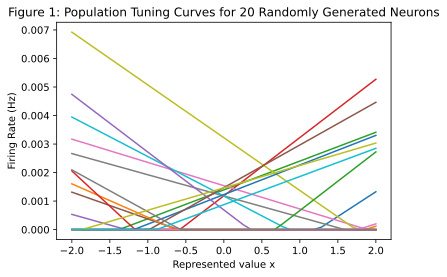

In [62]:
tref = 0.002
trc = 0.020
# First, generate random values for amax and xi using the constraints from the problem
num_neurons = 20
linespace = np.linspace(-2, 2, num=40)

def generate_a_maxs(num_neurons):
    # 100 Hz < Frequency < 200 Hz
    freq_min = 100
    freq_max = 200
    a_maxs = np.random.uniform(freq_min, freq_max, num_neurons)
    return a_maxs

def generate_intercepts(num_neurons):
    #  -2 < Intercept < 2
    intercept_min = -2
    intercept_max = 2
    intercepts = np.random.uniform(intercept_min,intercept_max, num_neurons)
    return intercepts

def find_gain(amax, encoder, intercept):
    return 1 / (1 - amax) * ( 1 - np.exp( (tref - (1/ amax)) / trc ))

def find_j_bias(intercept, encoder, a):
    return (-encoder) * intercept * a

def RMSE(size, X, X_hat):
    sum = 0
    for i in range (size):
        sum = sum + np.square(X[i]-X_hat[i])
    rmse = np.sqrt(sum) / size
    return rmse

class LIFNeuron: 
    def __init__(self, index, a_maxs, intercepts):
        self.index = index
        self.encoder = np.random.choice([-1,1])
        self.amax = a_maxs[index]
        self.intercept = intercepts[index]
        self.a = find_gain(self.amax, self.encoder, self.intercept)
        self.j_bias = find_j_bias(self.intercept, self.encoder, self.a)
        self.slope = []

    def find_firing_rate(self, linespace):
        for x in linespace:
            slope = max((self.a * np.dot(x,self.encoder)) + self.j_bias, 0)
            self.slope.append(slope)

# Create neurons
neurons = []
a_maxs = generate_a_maxs(num_neurons)
intercepts = generate_intercepts(num_neurons)

for i in range (num_neurons):
    neurons.append(LIFNeuron(i, a_maxs, intercepts))

# Find neuron firing rates
for i in range (num_neurons):
    neurons[i].find_firing_rate(linespace)

for i in range (num_neurons):
    plt.plot(linespace, neurons[i].slope)
    plt.title("Figure 1: Population Tuning Curves for 20 Randomly Generated Neurons")
    plt.xlabel("Represented value x")
    plt.ylabel("Firing Rate (Hz)")

**b) Decoder and error computation.** Compute the decoders and plot $(x-\hat{x})$. When computing decoders, take into account noise ($\sigma=0.1 \cdot 200\,\mathrm{Hz}$). When computing $\hat{x}$, add random Gaussian noise with $\sigma=0.1 \cdot 200\,\mathrm{Hz}$ to the activity. Report the Root Mean-Squared Error (RMSE).

ValueError: x and y must have same first dimension, but have shapes (40,) and (20, 40)

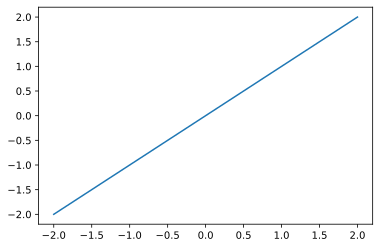

In [81]:
activities = []
inputs = []

for i in range (num_neurons):
    activities.append(neurons[i].slope)
    inputs.append(linespace)

A = np.array(activities)
X = np.array(inputs)

# generate random Gaussian noise
mean = 0
max_std_dev = 20
noise = np.random.normal(mean, max_std_dev, np.shape(A)) 

# add noise and compute decoders
A_noisy =  A + noise
D = np.linalg.lstsq((A_noisy).T, X.T, rcond=None)[0].T[0]
X_hat = np.dot(D, A_noisy)

error = np.subtract(X, X_hat)

plt.plot(linespace, linespace)
plt.plot(linespace, X_hat)

plt.title("Figure 2: Ideal and Decoded Value")
plt.xlabel("Represented value x")
plt.ylabel("Decoded xhat")
plt.legend(['Ideal', 'Decoded'])
plt.show()

plt.title("Figure 3: Error x - xhat")
plt.xlabel("Represented value x")
plt.ylabel("Decoded xhat")
plt.plot(linespace, error.T)
plt.show()

print(np.size(X), np.size(X_hat))
size = np.size(X)
rmse = RMSE(size, X, X_hat)
print(" RMSE: ", rmse)

# 2. Decoding from two spiking neurons

**a) Synaptic filter.** Plot the post-synaptic current
		$$
			h(t)= \begin{cases}
				0 & \text{if } t < 0 \,, \\
				\frac{e^{-t/\tau}}{\int_0^\infty e^{-t'/\tau} \mathrm{d}t'} & \text{otherwise} \,.
			\end{cases}
		$$

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Decoding using a synaptic filter.** Plot the original signal $x(t)$, the spikes, and the decoded $\hat{x}(t)$ all on the same graph.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**c) Error analysis.** Compute the RMSE of the decoding.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

# 3. Decoding from many neurons

**a) Exploring the error for an increasing neuron count.** Plot the Root Mean-Squared Error as the number of neurons increases, on a log-log plot. Try $8$ neurons, $16$ neurons, $32$, $64$, $128$, up to $256$. For the RMSE for a particular number of neurons, average over at least $5$ randomly generated groups of neurons. For each group of neurons, randomly generate the signal $x(t)$. Use the same parameters as in question 2.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Discussion.** Discuss your results. What is the systematic relationship between the neuron count and the error?

✍ \<YOUR SOLUTION HERE\>

# 4. Connecting two groups of neurons

**a) Computing a function.** Show the behaviour of the system with an input of $x(t)=t-1$ for $1\,\mathrm{s}$ (a linear ramp from $-1$ to $0$). Plot the ideal $x(t)$ and $y(t)$ values, along with $\hat{y}(t)$.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Step input.** Repeat part (a) with an input that is ten randomly chosen values between -1 and 0, each one held for 0.1 seconds (a randomly varying step input)

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**c) Sinusoidal input.** Repeat part (a) with an input that is $x(t)=0.2\sin(6\pi t)$.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**d) Discussion.** Briefly discuss the results for this question. Does the output match the ideal output? What kind of deviations do you see and why do those exist?

✍ \<YOUR SOLUTION HERE\>

# 5. Connecting three groups of neurons

**a) Sinusoidal input.** Plot $x(t)$, $y(t)$, the ideal $z(t)$, and the decoded $\hat{z}(t)$ for an input of $x(t)=\cos(3\pi t)$ and $y(t)=0.5 \sin (2 \pi t)$ (over $1\,\mathrm{s}$).

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Random input.** Plot $x(t)$, $y(t)$, the ideal $z(t)$, and the decoded $\hat{z}(t)$ for a random input over $1\,\mathrm{s}$. For $x(t)$ use a random signal with a limit of $8\,\mathrm{Hz}$ and $\mathtt{rms}=1$. For $y(t)$ use a random signal with a limit of $5\,\mathrm{Hz}$ and $\mathtt{rms}=0.5$.

In [ ]:
# ✍ <YOUR SOLUTION HERE>

# 6. Computing with vectors

**a) Constant inputs.** Plot the decoded output $\hat{w}(t)$ and the ideal $w$ for
		$$x =(0.5,1), \quad y = (0.1,0.3), \quad z =(0.2,0.1), \quad q = (0.4,-0.2) \,.$$

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Sinusoidal input.** Produce the same plot for
$$x =(0.5,1), \quad y = (\sin(4\pi t),0.3), \quad z =(0.2,0.1), \quad q = (\sin(4\pi t),-0.2) \,.$$

In [ ]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** Describe your results and discuss why and how they stray from the expected answer.

✍ \<YOUR SOLUTION HERE\>